Zadanie 1

In [3]:
using LinearAlgebra
using QuadGK
using ControlSystems

# Dane
m = 1.0  # masa wózka [kg]
β = 0.1  # współczynnik oporów ruchu [Ns/m]
Δ = 0.5  # przedział próbkowania [s]

# Macierze układu ciągłego
α = -β / m
b = 1 / m
Ac = [0 1; 0 α]
Bc = [0; b]

# a) Wyznaczenie macierzy A, B ze wzoru (6) 
A_a = exp(Ac * Δ)
B_a = quadgk(t -> exp(Ac * t) * Bc, 0, Δ)[1]

# b) Wyznaczenie macierzy A, B ze wzorów (14) oraz (15)
A_b = [1 (1/α*(exp(α * Δ)-1)); 0 exp(α * Δ)]
B_b = -1 / β * [(1 / α * (exp(α * Δ) - 1) - Δ); (exp(α * Δ) - 1)]

# c) Wyznaczenie macierzy A, B za pomocą procedury c2d
sys_c = ss(Ac, Bc, [1 0], 0)
sys_d = c2d(sys_c, Δ)
A_c = sys_d.A
B_c = sys_d.B

# Porównanie wyników
println("Macierz A:")
println("a) ", A_a)
println("b) ", A_b)
println("c) ", A_c)

println("\nMacierz B:")
println("a) ", B_a)
println("b) ", B_b)
println("c) ", B_c)

Macierz A:
a) [1.0 0.48770575499285995; 0.0 0.9512294245007142]
b) [1.0 0.48770575499285984; 0.0 0.951229424500714]
c) [1.0 0.48770575499285995; 0.0 0.9512294245007142]

Macierz B:
a) [0.12294245007140092, 0.48770575499285995]
b) [0.12294245007140159, 0.48770575499285984]
c) [0.12294245007140092; 0.48770575499286;;]


Zadanie 2

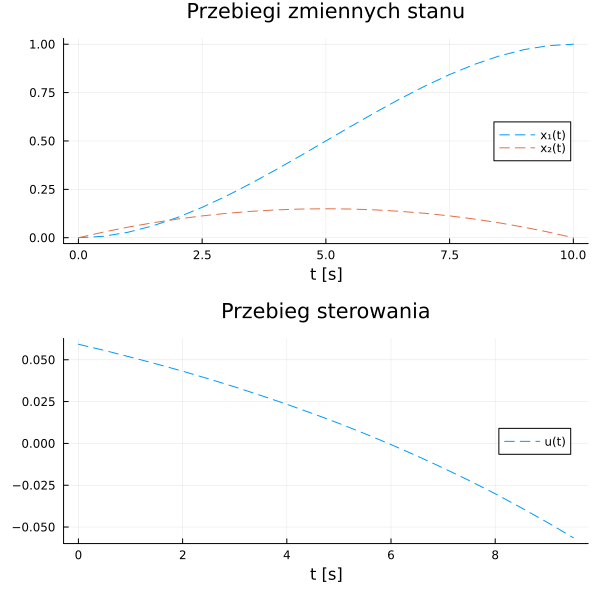

In [7]:
using LinearAlgebra
using Plots

# Dane
m = 1.0  # masa wózka [kg]
β = 0.1  # współczynnik oporów ruchu [Ns/m]
Δ = 0.5  # przedział próbkowania [s]
x0 = [0.0; 0.0]  # stan początkowy
tf = 10.0  # czas końcowy [s]

# Macierze układu ciągłego
α = -β / m
b = 1 / m
Ac = [0 1; 0 α]
Bc = [0; b]

# Wyznaczenie macierzy A, B odpowiednika dyskretnego
A = exp(Ac * Δ)
B = quadgk(t -> exp(Ac * t) * Bc, 0, Δ)[1]

# Sekwencja sterowań
u = [0.0593, 0.0556, 0.0516, 0.0475, 0.0432, 0.0386, 0.0338, 0.0287, 0.0234,
  0.0178, 0.0120, 0.0058, -0.0007, -0.0075, -0.0147, -0.0222, -0.0301,
  -0.0385, -0.0472, -0.0564]

# Symulacja odpowiedzi układu
N = length(u)
x = zeros(2, N + 1)
x[:, 1] = x0
for k = 1:N
  x[:, k+1] = A * x[:, k] + B * u[k]
end

# Przygotowanie danych do wykresów
t = 0:Δ:tf
x1 = x[1, :]
x2 = x[2, :]

# Wykres zmiennych stanu
p1 = plot(t, x1, label="x₁(t)", xlabel="t [s]", title="Przebiegi zmiennych stanu", linestyle=:dash)
plot!(p1, t, x2, label="x₂(t)", legend=:right, linestyle=:dash)

# Wykres sterowania
p2 = plot(t[1:end-1], u, label="u(t)", xlabel="t [s]", title="Przebieg sterowania", legend=:right, step=:post, linestyle=:dash)

# Połączenie wykresów
plot(p1, p2, layout=(2, 1), size=(600, 600))

Zadanie 3

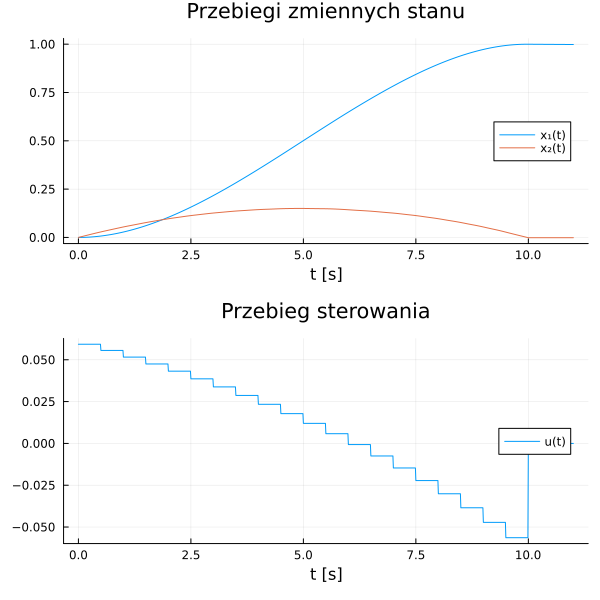

In [1]:
using LinearAlgebra
using Plots
using DifferentialEquations

# Dane
m = 1.0  # masa wózka [kg]
β = 0.1  # współczynnik oporów ruchu [Ns/m]
Δ = 0.5  # przedział próbkowania [s]
x0 = [0.0; 0.0]  # stan początkowy
tf = 11.0  # czas końcowy [s]

# Macierze układu ciągłego
α = -β / m
b = 1 / m
Ac = [0 1; 0 α]
Bc = [0; b]

# Sekwencja sterowań
u_seq = [0.0593, 0.0556, 0.0516, 0.0475, 0.0432, 0.0386, 0.0338, 0.0287, 0.0234,
  0.0178, 0.0120, 0.0058, -0.0007, -0.0075, -0.0147, -0.0222, -0.0301,
  -0.0385, -0.0472, -0.0564]

# Funkcja sterowania (sygnał schodkowy)
function u_func(t)
  idx = Int(floor(t / Δ)) + 1
  if idx > length(u_seq)
    return 0.0
  else
    return u_seq[idx]
  end
end

# Funkcja prawych stron równania stanu
function state_space!(dx, x, p, t)
  dx[1] = x[2]
  dx[2] = α * x[2] + b * u_func(t)
end

# Rozwiązanie równania stanu
tspan = (0.0, tf)
prob = ODEProblem(state_space!, x0, tspan)
sol = solve(prob, saveat=0.01)

# Przygotowanie danych do wykresów
t = sol.t
x1 = [u[1] for u in sol.u]
x2 = [u[2] for u in sol.u]
u = [u_func(t) for t in sol.t]

# Wykres zmiennych stanu
p1 = plot(t, x1, label="x₁(t)", xlabel="t [s]", title="Przebiegi zmiennych stanu")
plot!(p1, t, x2, label="x₂(t)", legend=:right)

# Wykres sterowania
p2 = plot(t, u, label="u(t)", xlabel="t [s]", title="Przebieg sterowania", legend=:right, step=:post)

# Połączenie wykresów
plot(p1, p2, layout=(2, 1), size=(600, 600))